In [ ]:
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.express as px

In [53]:
bmd= pd.read_csv('DATOS/bm_desc.csv')
bmd['ola']=bmd['ola'].astype(str)
bmd['s11_phq9']=bmd['s11_phq9'].astype('Int64')

In [54]:
bmd.head()

,idencuesta,s11_phq9,s11_phq9_bin,ola,m0_sexo_fac,m01_fac,s_imc_fac,s04_fac,s12_fac,ponderador02
0,1101011,19,1.0,2016,Mujer,Básica,Normal,Nunca o casi nunca,Algunas veces,0.846000
1,1101011,17,1.0,2017,Mujer,Básica,NaN,NaN,NaN,0.715155
2,1101011,18,1.0,2018,Mujer,Básica,Normal,1 a 8 veces al mes,Nunca o pocas veces,0.959134
3,1101011,8,0.0,2019,Mujer,Básica,NaN,NaN,NaN,1.291904
4,1101012,16,1.0,2016,Mujer,Media,Obesidad,Nunca o casi nunca,Siempre o Casi Siempre,0.846000


2016    1913
2017    1913
2018    1913
2019    1913
Name: ola, dtype: int64

## Puntajes Globales

In [93]:
phq_gl=round(100*bmd.groupby(['ola','s11_phq9'])['s11_phq9'].count()/1913,2)
phq_gl.name='prop'
df_phq_gl=phq_gl.reset_index()
df_phq_gl

,ola,s11_phq9,prop
0,2016,0,13.70
1,2016,1,8.21
2,2016,2,8.68
3,2016,3,9.10
4,2016,4,8.15
...,...,...,...
107,2019,23,0.47
108,2019,24,0.47
109,2019,25,0.47
110,2019,26,0.16


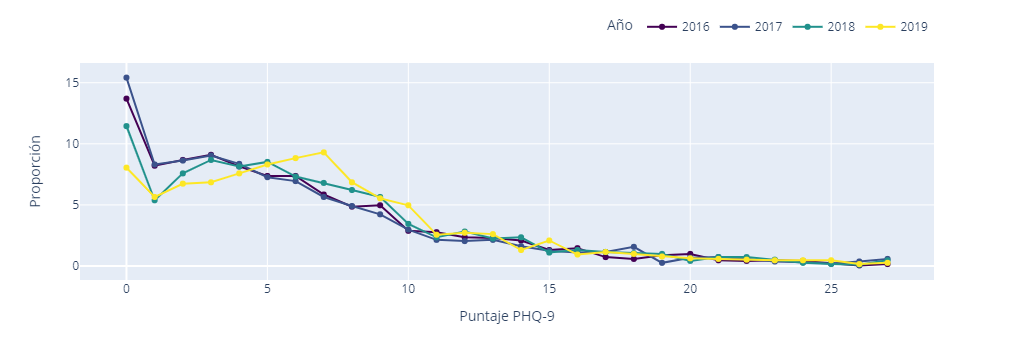

In [100]:
(px.line(df_phq_gl,
    x='s11_phq9',
        y='prop',
        color='ola',
        markers=True,
        color_discrete_sequence=['#440154','#3b528b','#21918c','#fde725'],
        labels=dict(prop='Proporción',
                   ola='Año',
                   s11_phq9='Puntaje PHQ-9')).
   update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.1,
    xanchor="right",
    x=1)))

## Proporción puntajes sobre 10 

In [ ]:
s10_ola=(bmd[['ola','s11_phq9_bin','ponderador02']].
         dropna().
         groupby('ola').
         apply(lambda x: 100*np.average(x['s11_phq9_bin'], 
                                    weights=x['ponderador02'])).
         round(2).
         reset_index())
s10_ola.columns=['ola','prop']
s10_ola

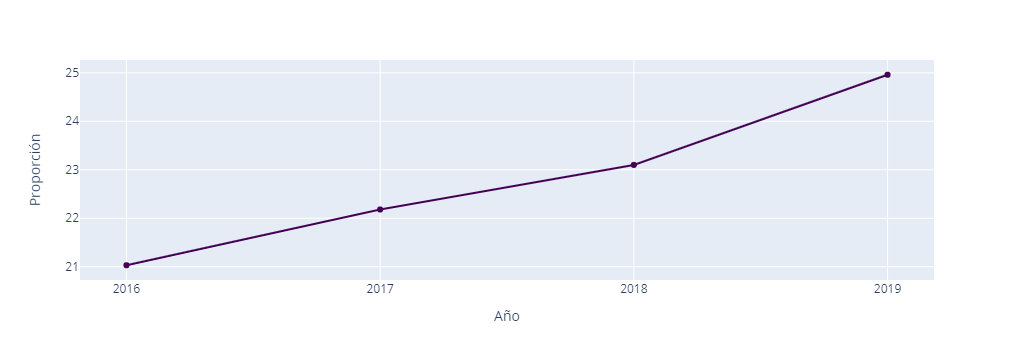

In [41]:
gf_s10_ola=(px.line(s10_ola,
       x='ola',
       y='prop',
          color_discrete_sequence=['#440154'],
        markers=True,
        labels=dict(prop='Proporción',ola='Año')).
   update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.1,
    xanchor="right",
    x=1)))
gf_s10_ola

In [ ]:
#Función para calcular promedios ponderados
def w_avg(var):
    base= bmd[['s11_phq9_bin','ola','ponderador02',var]].dropna()
    w_meds =100*base.groupby(['ola',var]).apply(lambda x: np.average(x['s11_phq9_bin'], weights=x['ponderador02'])).round(2)
    df_meds=w_meds.reset_index()
    df_meds.columns=['ola',var,'phq_s10']
    df_meds['ola']=df_meds['ola'].astype(str)
    return df_meds
# Gráficos
def grafo_var(var,desc):
    base_gf=w_avg(var)
    cionario= {'phq_s10':'Proporción','ola':'Año',var:desc}
    fig=(px.line(base_gf,
       x='ola',
       y='phq_s10',
       color=var,
        facet_col=var,
          color_discrete_sequence=['#440154','#fde725','#3b528b','#21918c'],
        markers=True,
        labels=cionario).
   update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=1.1,
    xanchor="right",
    x=1)).
    for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1])))
    return fig


In [ ]:
grafo_var('m0_sexo_fac','Género')

In [ ]:
grafo_var('m01_fac','Nivel Educacional)

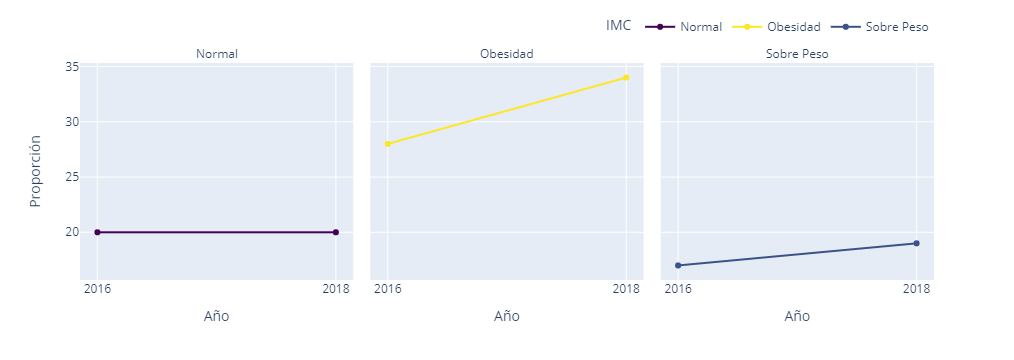

In [43]:
grafo_var('s_imc_fac','IMC')

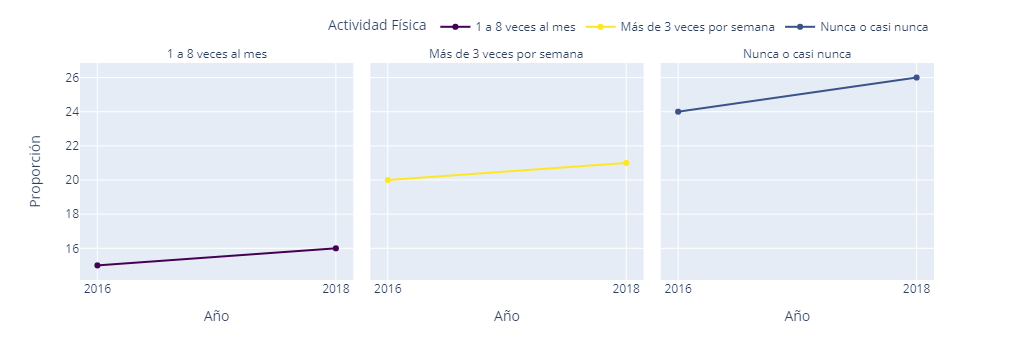

In [44]:
grafo_var('s04_fac','Actividad Física')

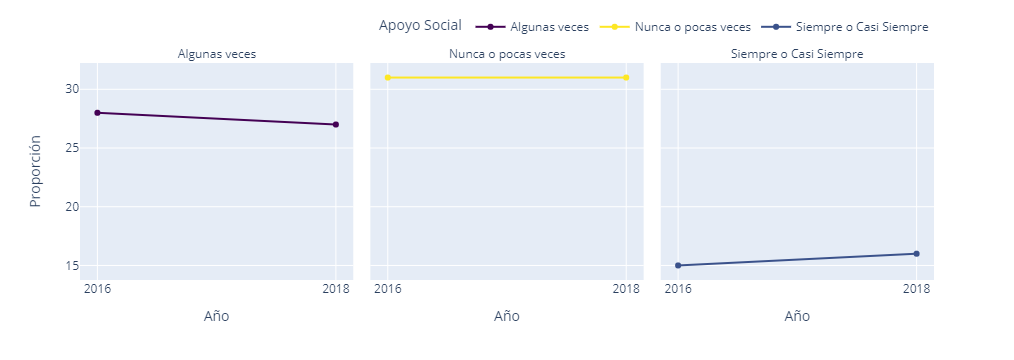

In [45]:
grafo_var('s12_fac','Apoyo Social')